# PARTE 1

# PUNTO 1

La base de datos que elegi es una clasificacion de de datos sobre pulsos de radiofrecuencia que son candidatos a posibles pulsares.

FUENTE: https://www.kaggle.com/datasets/prishasawhney/pulsar-classification-for-class-prediction-cleaned

In [ ]:
from google.colab import files


# Seleccionar el archivo CSV desde tu sistema de archivos local
uploaded = files.upload()

Saving Pulsar_cleaned.csv to Pulsar_cleaned.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv("https://raw.githubusercontent.com/tdure1901/TP-MATE-3-THOMAS/main/Pulsar_cleaned.csv")
df

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,1.502969,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,0.788423,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,0.323558,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,0.958983,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,1.232198,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...
14982,96.000000,0.537495,0.281344,1.871237,15.833746,9.634927,104.821623,0
14983,136.429688,1.349991,-0.738123,1.296823,12.166062,15.450260,285.931022,0
14984,122.554688,0.316006,0.323061,16.409699,44.626893,2.945244,8.297092,0
14985,119.335938,0.213253,-0.743025,21.430602,58.872000,2.499517,4.595173,0


Como se puede observar en la tabla, tenemos un total de 8 columnas de datos. A continuacion se menciona una por una y se da una breve explicacion:

1) "Mean_Integrated": Es la media obtenida de las observaciones sobre cada pulso analizado.

2) "EK": Exceso de kurtosis de las observaciones(Indica si la cantidad de valores atipicos es mucha y puede afectar los resultados o no)

3) "Skewness": Medicion de la simetria entre los datos de cada observacion.

4) "Mean_DMSNR_Curve": Es la media de la relación de potencia entre la fuerza de señal y el nivel de ruido que se observa en cada medicion del pulso.

5) "SD_DMSNR_Curve": Es la desviacion estadar de la relación de potencia entre la fuerza de señal y el nivel de ruido que se observa en cada medicion del pulso.

6) "EK_DMSNR_Curve": Exceso de kurtosis en las mediciones de la relación de potencia entre la fuerza de señal y el nivel de ruido que se observa en cada medicion del pulso.

7) "Skewness_DMSNR_Curve": Medicion de la simetria entre las observaciones de la relación de potencia entre la fuerza de señal y el nivel de ruido que se observa en cada medicion del pulso.

8) "Class": clasificacion basada en los datos recopilados para predecir si el pulso es un pulsar "1" o no lo es "0"



# PUNTO 2


La base de datos a utilizar cuenta con 8 columnas y un total de 14987 datos recopilados para entrenamiento y prueba de la red neuronal.

Como se observa en la descripcion de cada variable, cada una de ellas estan relacionadas. Son varias estadisticas aplicadas sobre datos de observaciones recopilados sobre cada pulso.
En base a todas estas estadisticas, se puede realizar una prediccion de si ese pulso de radiofrecuencia es un pulsar o no.









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       14987 non-null  float64
 1   EK                    14987 non-null  float64
 2   Skewness              14987 non-null  float64
 3   Mean_DMSNR_Curve      14987 non-null  float64
 4   SD_DMSNR_Curve        14987 non-null  float64
 5   EK_DMSNR_Curve        14987 non-null  float64
 6   Skewness_DMSNR_Curve  14987 non-null  float64
 7   Class                 14987 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 936.8 KB



Veamos ahora la correlacion de las variables.

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
features = ["Mean_Integrated","EK", "Skewness",
            "Mean_DMSNR_Curve","SD_DMSNR_Curve",
            "EK_DMSNR_Curve","Skewness_DMSNR_Curve"]


Q1= df[features].quantile(0.25)
Q3= df[features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[features] < (Q1 - 1.5 * IQR)) | )



UndefinedVariableError: local variable 'IQR' is not defined

In [ ]:
def minmax_norm(df_input):
    return (df - df.min()) / (df.max() - df.min())


df_n = minmax_norm(df_features)

df_n

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0.688724,0.237231,0.093259,0.032276,0.175419,0.449559,0.207228,0.0
1,0.428159,0.124443,0.127147,0.012999,0.093973,0.585135,0.352398,0.0
2,0.431636,0.051066,0.414737,0.031281,0.225897,0.437064,0.176993,0.0
3,0.662619,0.151365,0.104902,0.037887,0.210847,0.393314,0.150832,0.0
4,0.333797,0.194491,0.428017,0.006690,0.028986,0.777638,0.694279,0.0
...,...,...,...,...,...,...,...,...
14982,0.383599,0.084835,0.273385,0.015455,0.112630,0.536055,0.290748,0.0
14983,0.660426,0.213084,0.086195,0.008183,0.042349,0.839182,0.785404,0.0
14984,0.565422,0.049874,0.281045,0.199522,0.664373,0.187353,0.027116,0.0
14985,0.543383,0.033655,0.085294,0.263089,0.937342,0.164120,0.017005,0.0


In [ ]:
df_correlacion = df_n.corr()
df_correlacion

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,-0.120041,-0.614070,0.051050,0.060930,-0.075997,-0.066404,-0.167322
EK,-0.120041,1.000000,0.466429,0.151247,0.129209,-0.086030,-0.067496,0.304276
Skewness,-0.614070,0.466429,1.000000,-0.027227,-0.043491,0.059053,0.054613,0.203551
Mean_DMSNR_Curve,0.051050,0.151247,-0.027227,1.000000,0.891525,-0.703401,-0.563191,0.200122
SD_DMSNR_Curve,0.060930,0.129209,-0.043491,0.891525,1.000000,-0.825305,-0.728246,0.207255
EK_DMSNR_Curve,-0.075997,-0.086030,0.059053,-0.703401,-0.825305,1.000000,0.967330,-0.127940
Skewness_DMSNR_Curve,-0.066404,-0.067496,0.054613,-0.563191,-0.728246,0.967330,1.000000,-0.102472
Class,-0.167322,0.304276,0.203551,0.200122,0.207255,-0.127940,-0.102472,1.000000


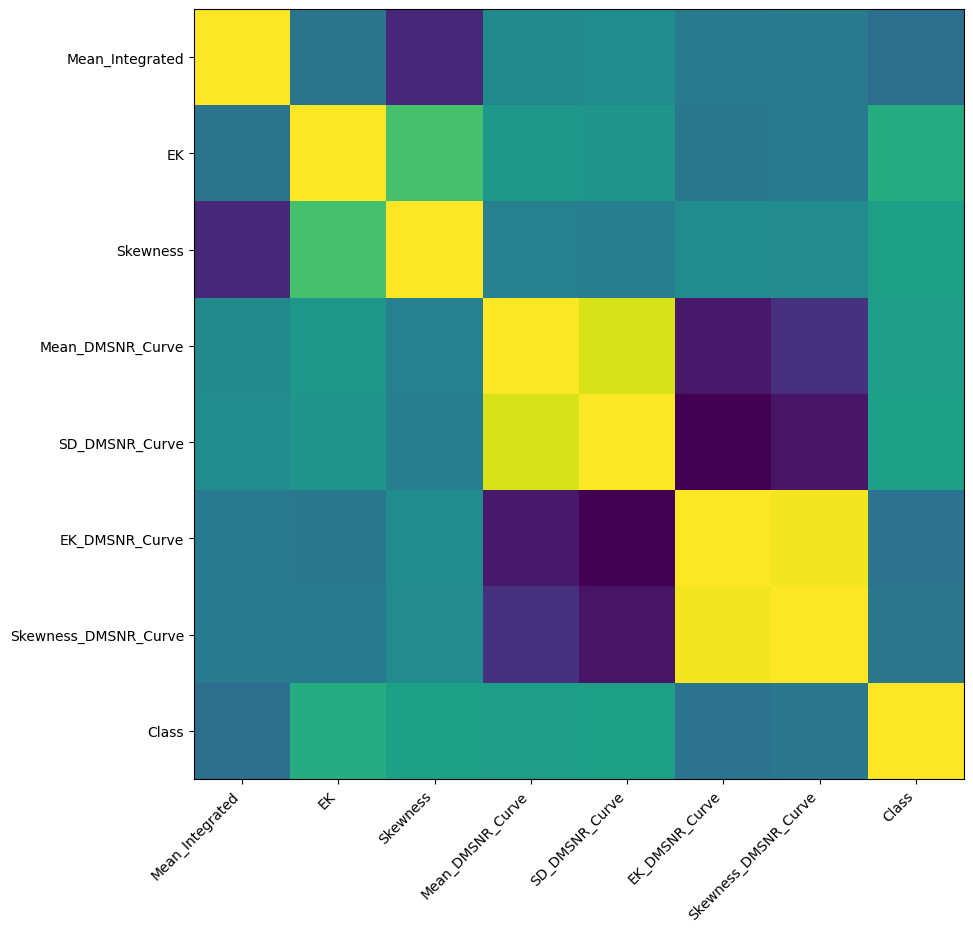

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df_n.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df_n.columns.to_list(), ha='right');

# PARTE 2

PUNTO 1:

In [ ]:


all_inputs = df_n.iloc[:, :-1].values
all_outputs = df_n.iloc[:, -1].values

# Dividir los conjuntos de datos de entrenamiento y prueba
def dividir_datos(X, y, test_ratio=0.33):
    num_muestras = len(y)
    num_muestras_test = int(num_muestras * test_ratio)

    indices = np.random.permutation(num_muestras)

    X_train = X[indices[num_muestras_test:]]
    X_test = X[indices[:num_muestras_test]]
    Y_train = y[indices[num_muestras_test:]]
    Y_test = y[indices[:num_muestras_test]]

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = dividir_datos(all_inputs, all_outputs, test_ratio=0.22)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape



((11690, 7), (3297, 7), (11690,), (3297,))

In [ ]:

n = X_train.shape[0]
w_oculta = np.random.rand(7, 7)
w_salida = np.random.rand(1, 7)

b_oculta = np.random.rand(7, 1)
b_salida = np.random.rand(1, 1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_oculta @ X + b_oculta
    A1 = relu(Z1)
    Z2 = w_salida @ A1 + b_salida
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


    # Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_salida
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2





ACCURACY:  0.023961176827418867


PUNTO 2:

In [ ]:
# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = (test_predictions >= 0.5).astype(int)
accuracy = np.mean(test_comparisons == Y_test.reshape(1, -1))
print("ACCURACY: ", accuracy)

ACCURACY:  0.023961176827418867


In [ ]:
tamanio_muestra = 1  # tamaño de la muestra
L = .07  # La tasa de aprendizaje


# Realizando Descenso de Gradiente Estocástico
for i in range(50_000):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_oculta -= L * dW1
    b_oculta -= L * dB1
    w_salida -= L * dW2
    b_salida -= L * dB2

In [ ]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = (test_predictions >= 0.5).astype(int)
accuracyTest = np.mean(test_comparisons == Y_test.reshape(1, -1))

test_predictions = forward_prop(X_train.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = (test_predictions >= 0.5).astype(int)
accuracyTrain = np.mean(test_comparisons == Y_train.reshape(1, -1))

print("Puntaje del conjunto de entrenamiento:", accuracyTrain)
print("Puntaje del conjunto de prueba:", accuracyTest)



Puntaje del conjunto de entrenamiento: 0.9846022241231822
Puntaje del conjunto de prueba: 0.981195025781013


#PARTE 3

PUNTO 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Redskl = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(7,1),
                   activation='relu',
                   max_iter=150_000,
                   learning_rate_init=.05)

Redskl.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(Redskl.coefs_)
print(Redskl.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % Redskl.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % Redskl.score(X_test, Y_test))

[array([[-0.15824092, -0.96240148,  0.05539148, -0.22953204, -0.0221638 ,
         1.42899838,  1.74154801],
       [-0.20003313, -1.00437196,  0.5343633 , -0.01830112,  2.03674698,
         0.35783457,  0.605509  ],
       [ 1.03215912,  0.36150678,  0.29586191, -0.42765975, -0.43275291,
        -0.6544791 , -0.95148094],
       [-0.57691592,  0.63229   , -0.60784965,  0.26073371,  0.20955527,
         0.26705848,  0.77014891],
       [-0.61102094, -0.69216203,  0.61234534,  0.13263919,  0.28477053,
        -0.16727396, -0.70890026],
       [-0.38988672, -0.92649053,  0.97437655, -0.17538966, -0.30551989,
        -0.85682525, -0.1141567 ],
       [ 0.29367915,  0.50597163, -0.37020681, -0.11076202, -0.16195328,
        -0.2751193 , -0.10551948]]), array([[ 0.74171683],
       [ 1.45844331],
       [-0.73177432],
       [-0.86200552],
       [-1.62556398],
       [ 1.69695719],
       [ 1.74339504]]), array([[-3.72242362]])]
[array([-0.12191537,  1.08156149, -0.35545015, -0.20100307, -